<a href="https://colab.research.google.com/github/OnurKerimoglu/Colab_Notebooks/blob/master/Pytorch_Learning_non_linearities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notice how increasing the number of layers increases the capacity of the classifier.  Source: https://cs231n.github.io/neural-networks-case-study/

* Try experimenting with weight decay regularization and different learning rates. You will find the formulas below. 

 



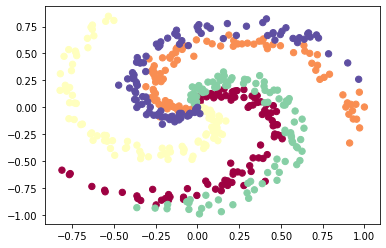

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 5 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# 1st try: just input and output layers




In [2]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

In [3]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

In [4]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

#probs.shape

In [6]:
correct_logprobs = -np.log(probs[range(num_examples),y])
correct_logprobs.shape

(500,)

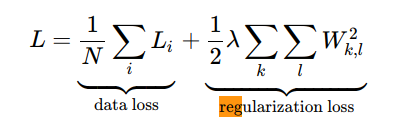

In [7]:
# compute the loss: average cross-entropy loss and regularization
reg = 0.5 ## reg represents the lambda parameter in the equation above 
           ### this lambda is also called the 'weight decay' coefficient for l2 regularization
           ### CHOOSE A VALUE BETWEEN 0 AND 1

data_loss = np.sum(correct_logprobs)/num_examples #??
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

In [8]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
probs.shape

(500, 5)

In [9]:
correct_logprobs = -np.log(probs[range(num_examples),y])
correct_logprobs.shape

(500,)

In [10]:
# compute the loss: average cross-entropy loss and regularization
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

In [11]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

In [12]:
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

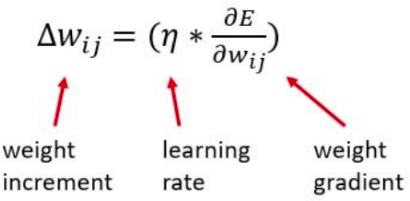

In [13]:
# perform a parameter update, with a given step size (aka the learning rate)
step_size = 0.05 ## Choose a value between 0 and 0.1 for the learning rate
W += -step_size * dW
b += -step_size * db

In [15]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some recommended hyperparameters
#step_size = 1e-0
#reg = 1e-3 # regularization strength
step_size = 0.1
reg = 1e-3

# gradient descent loop
num_examples = X.shape[0]
for i in range(1000):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print(f"iteration {i}: loss {loss}")

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.6093579413747037
iteration 10: loss 1.5913562628862292
iteration 20: loss 1.5745690703885182
iteration 30: loss 1.5589074595504966
iteration 40: loss 1.544288548063729
iteration 50: loss 1.5306352158235184
iteration 60: loss 1.5178758471602227
iteration 70: loss 1.5059440641510116
iteration 80: loss 1.494778448752086
iteration 90: loss 1.4843222560277674
iteration 100: loss 1.474523122732629
iteration 110: loss 1.4653327759897048
iteration 120: loss 1.4567067464852805
iteration 130: loss 1.448604089895035
iteration 140: loss 1.4409871194220698
iteration 150: loss 1.4338211515080994
iteration 160: loss 1.4270742660476103
iteration 170: loss 1.4207170818210728
iteration 180: loss 1.4147225473722866
iteration 190: loss 1.4090657471782486
iteration 200: loss 1.40372372268295
iteration 210: loss 1.398675307572646
iteration 220: loss 1.3939009765432222
iteration 230: loss 1.3893827067357576
iteration 240: loss 1.3851038509816975
iteration 250: loss 1.3810490219939522
iter

(-1.9898295677112214, 1.830170432288782)

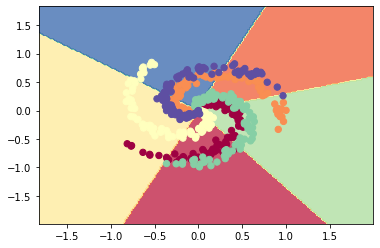

In [16]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [17]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
acc = (np.mean(predicted_class == y))
print(f"training accuracy: {acc}")

training accuracy: 0.318


# 2nd try: add a hidden layer

In [19]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [20]:
# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2

In [21]:
# backpropate the gradient to the parameters
# first backprop into parameters W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

In [22]:
dhidden = np.dot(dscores, W2.T)


In [23]:
# backprop the ReLU non-linearity
dhidden[hidden_layer <= 0] = 0

In [24]:
# finally into W,b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

In [25]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print(f"iteration {i} loss {loss}")

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0 loss 1.6095549210148503
iteration 1000 loss 0.7949183511260667
iteration 2000 loss 0.7346067789204778
iteration 3000 loss 0.7186367964450697
iteration 4000 loss 0.722621539861666
iteration 5000 loss 0.7081495196209427
iteration 6000 loss 0.7059783289706505
iteration 7000 loss 0.713722898007765
iteration 8000 loss 0.7090450705536814
iteration 9000 loss 0.7048758541615703


In [26]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
acc = (np.mean(predicted_class == y))
print(f'training accuracy: {acc}') 

training accuracy: 0.816


(-1.9898295677112214, 1.830170432288782)

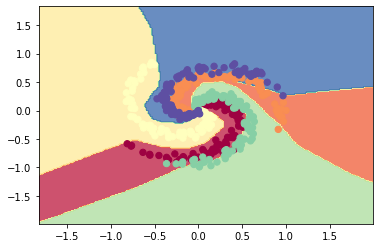

In [27]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
